# Exploratory Data Analysis of Stroke Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
# import the data
df = pd.read_csv('../dataset/stroke.csv')

In [3]:
#data size
df.shape

(5110, 12)

In [4]:
#first five rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#Numerical counts
print(df.stroke.value_counts())

0    4861
1     249
Name: stroke, dtype: int64


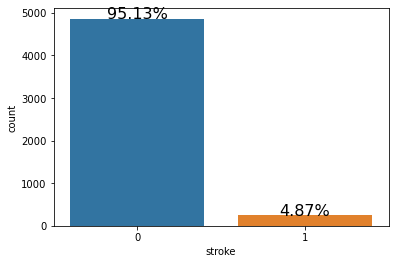

In [6]:
#plot the distribution of the stroke outcome
s = sns.countplot(x='stroke', data=df)
sizes = []
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x() + p.get_width()/2.,
          height+3,
          '{:1.2f}%'.format(height/len(df)*100),
          ha='center', fontsize=16)
    
#saving the image to disk
#fig = s.get_figure()
#fig.savefig('../images/stroke_dist.png')
#plt.savefig('...')
#plt.savefig('../images/eda1.png')

In [7]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
#missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#print percentage of the missing values
print(df['bmi'].isnull().mean()*100)

3.9334637964774952


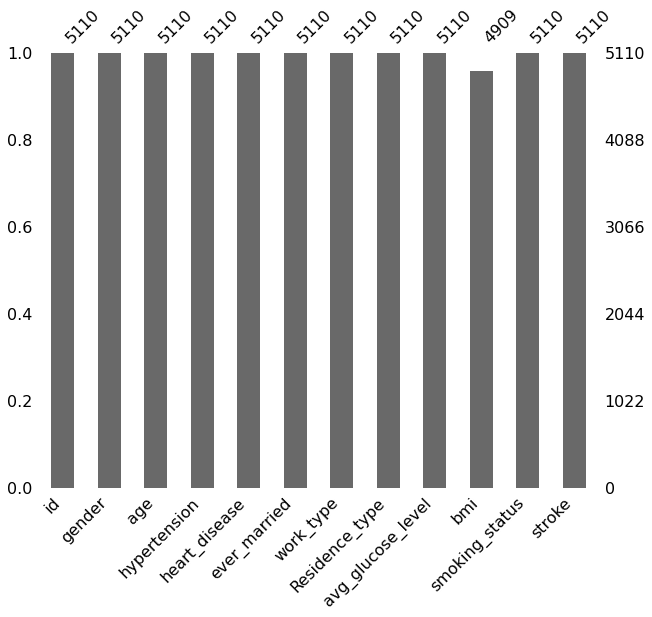

In [10]:
#plot missing values
fig = msno.bar(df, figsize=(10,8))
fig_copy = fig.get_figure()
#fig_copy.savefig('../images/missing1.png',bbox_inches = 'tight')

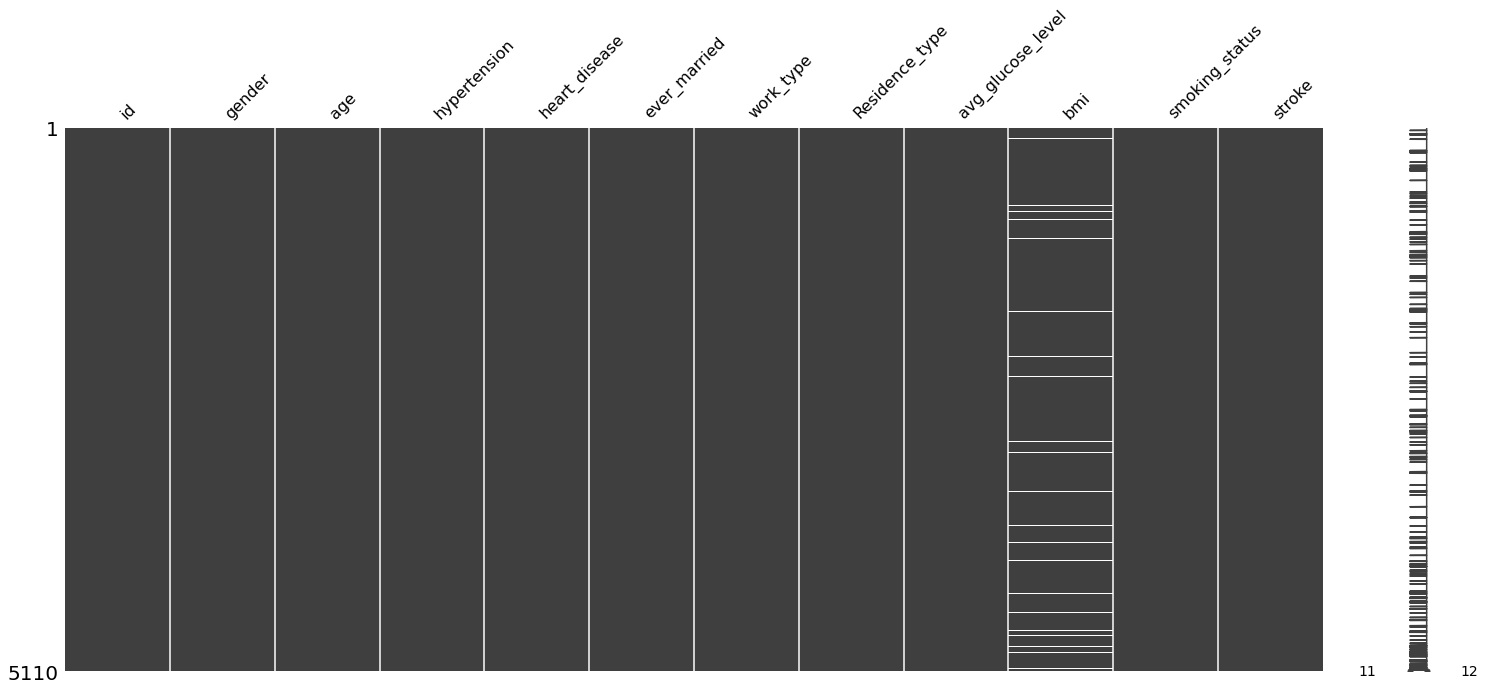

In [11]:
#missing values matrix
fig = msno.matrix(df.sort_values('stroke'))

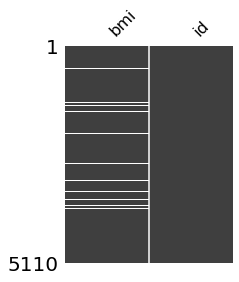

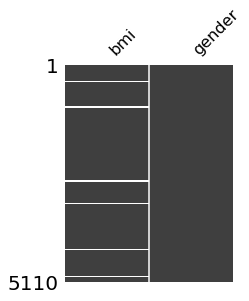

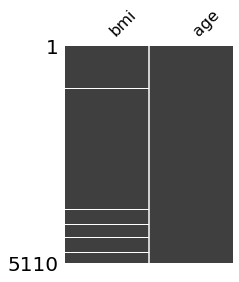

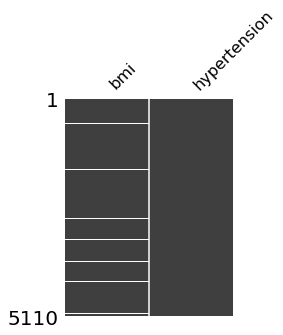

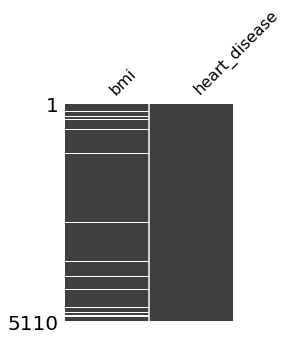

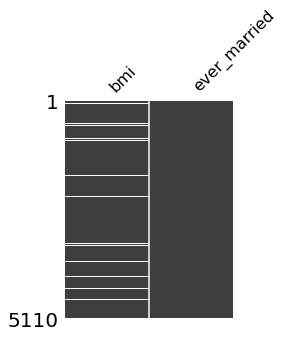

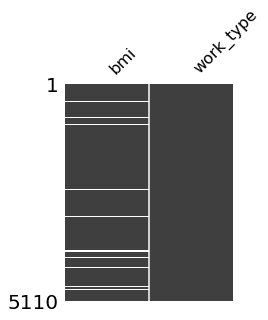

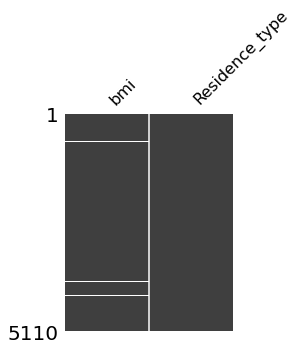

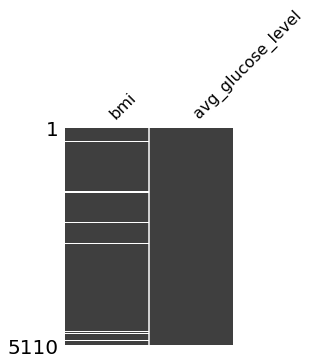

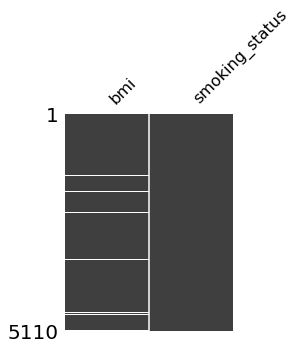

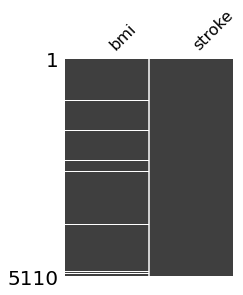

In [12]:
for c in df.columns:
    if c=='bmi':
        continue
    max_col = ['bmi',c]
    fig = msno.matrix(df[max_col].sort_values(c), figsize=(3,4), sparkline=False)

In [13]:
#creating a method to check for nullity
def nullity_with_val(col1, col2, df=df):
    for val in np.sort(df[col2].dropna().unique()):
        missingness = df.loc[df[col2]==val, col1].isnull().mean()*100
        print(f'Missingness percentage of {col1} when the value of {col2} equals {val}: {round(missingness)}%')

In [14]:
nullity_with_val('bmi','stroke')

Missingness percentage of bmi when the value of stroke equals 0: 3%
Missingness percentage of bmi when the value of stroke equals 1: 16%


In [15]:
df.select_dtypes(include='object').columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [16]:
for c in df.select_dtypes(include='object').columns:
    if c=='id':
        continue
    nullity_with_val('bmi',c)
    print('\n')

Missingness percentage of bmi when the value of gender equals Female: 3%
Missingness percentage of bmi when the value of gender equals Male: 5%
Missingness percentage of bmi when the value of gender equals Other: 0%


Missingness percentage of bmi when the value of ever_married equals No: 3%
Missingness percentage of bmi when the value of ever_married equals Yes: 4%


Missingness percentage of bmi when the value of work_type equals Govt_job: 4%
Missingness percentage of bmi when the value of work_type equals Never_worked: 0%
Missingness percentage of bmi when the value of work_type equals Private: 4%
Missingness percentage of bmi when the value of work_type equals Self-employed: 5%
Missingness percentage of bmi when the value of work_type equals children: 2%


Missingness percentage of bmi when the value of Residence_type equals Rural: 4%
Missingness percentage of bmi when the value of Residence_type equals Urban: 4%


Missingness percentage of bmi when the value of smoking_status equa

In [1]:
#df.drop('id', axis=1,inplace=True)

## 1 Univariate Analysis

In [19]:
cat_col_names = ['gender','ever_married','work_type','Residence_type','smoking_status','hypertension','heart_disease','stroke']
num_col_names = ['age','bmi','avg_glucose_level']

In [20]:
print(cat_col_names)
print(num_col_names)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']
['age', 'bmi', 'avg_glucose_level']


In [21]:
df[num_col_names].head()

,age,bmi,avg_glucose_level
0,67.0,36.6,228.69
1,61.0,NaN,202.21
2,80.0,32.5,105.92
3,49.0,34.4,171.23
4,79.0,24.0,174.12


In [21]:
df[cat_col_names].head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
0,Male,Yes,Private,Urban,formerly smoked,0,1,1
1,Female,Yes,Self-employed,Rural,never smoked,0,0,1
2,Male,Yes,Private,Rural,never smoked,0,1,1
3,Female,Yes,Private,Urban,smokes,0,0,1
4,Female,Yes,Self-employed,Rural,never smoked,1,0,1


### 1.1 Numerical Univariate Analysis 

Text(0.5, 1.0, 'Kinetic Density estimation Plot for Age, BMI, avg_glucose_level')

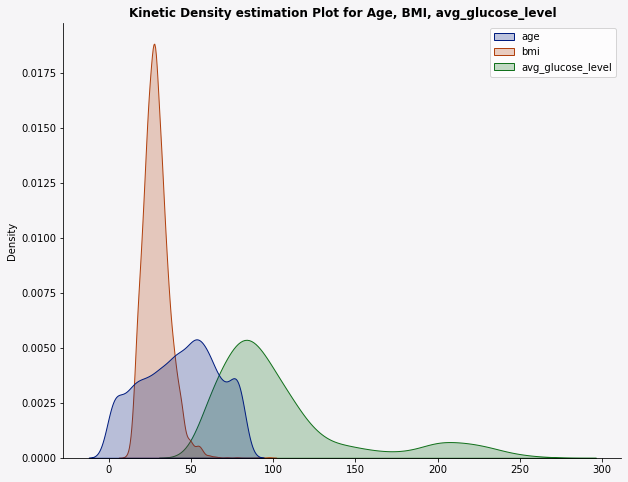

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f7')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.kdeplot(data=df[num_col_names], shade=True, palette='dark')
plt.title('Kinetic Density estimation Plot for Age, BMI, avg_glucose_level',fontweight='bold')
#plt.savefig('../images/eda2.png')

**Observation**
1. Average glucose level is skewed towards right, most of its values is between 50-150
2. Most of the people's BMI values ranges between 0-50
3. Age Distribution is between 0-100 evenly
4. The Numerical Data is not normally distributed

**Numerical Analysis with respect to Stroke**

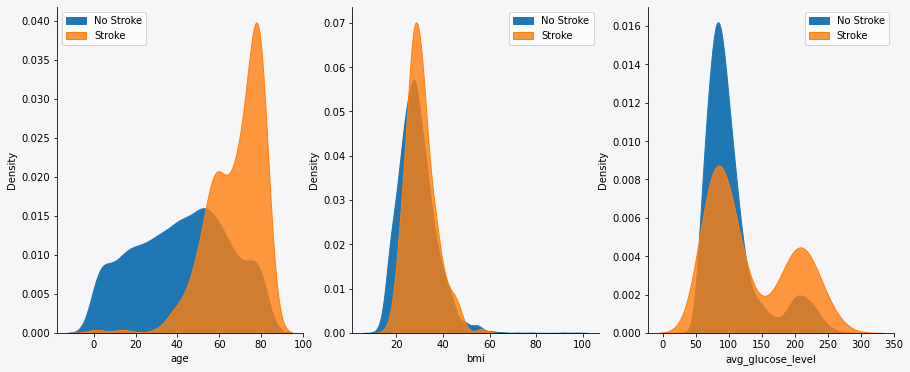

In [23]:
fig, axes = plt.subplots(1,3,figsize=(15,6))
fig.patch.set_facecolor('#f6f5f7')
#axes color
for axe in axes:
    axe.set_facecolor('#f6f5f7')
    axe.spines['top'].set_visible(False)
    axe.spines['right'].set_visible(False)

#plot kde for age
sns.kdeplot(x=df.loc[df['stroke']==0, 'age'],ax=axes[0],palette='dark',alpha = 1, label='No Stroke',shade=True)
sns.kdeplot(x=df.loc[df['stroke']==1, 'age'],ax=axes[0],palette='dark',alpha = 0.8, label='Stroke',shade=True)
#plot kde for bmi
sns.kdeplot(x=df.loc[df['stroke']==0, 'bmi'],ax=axes[1],palette='dark',alpha = 1, label='No Stroke',shade=True)
sns.kdeplot(x=df.loc[df['stroke']==1, 'bmi'],ax=axes[1],palette='dark',alpha = 0.8, label='Stroke',shade=True)
#plot kde for ag_glucose_level
sns.kdeplot(x=df.loc[df['stroke']==0, 'avg_glucose_level'],ax=axes[2],palette='dark',alpha = 1, label='No Stroke',shade=True)
sns.kdeplot(x=df.loc[df['stroke']==1, 'avg_glucose_level'],ax=axes[2],palette='dark',alpha = 0.8, label='Stroke',shade=True)
#set legends
axes[0].legend(loc='upper left')
axes[1].legend(loc='best')
axes[2].legend(loc='best')
#plt.title(f'KDE plot of age, bmi and avg_glucose_level with respect to stroke',fontweight='bold')
plt.savefig('../images/num.png')

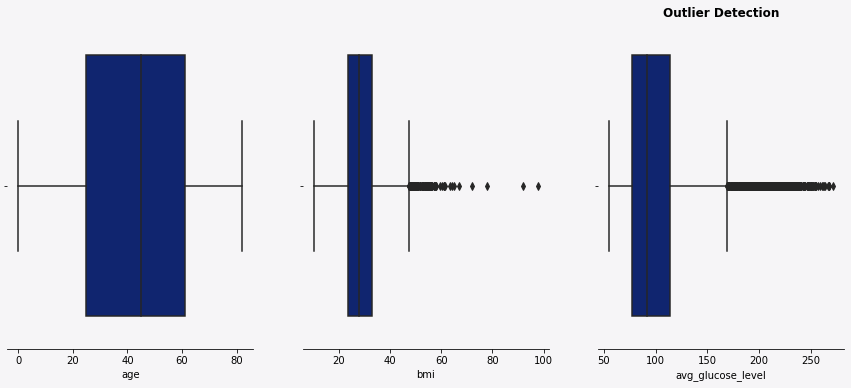

In [24]:
# checking the outliers in the data
fig, axes = plt.subplots(1,3,figsize = (15, 6))
fig.patch.set_facecolor('#f6f5f7')

i = 0
for num_col_name in num_col_names:
    #plt.subplot(2, 2, i)
    axes[i].set_facecolor('#f6f5f7')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    #axe.spines['right'].set_visible(False)
    sns.boxplot(x = df[num_col_name],ax=axes[i], palette='dark')
    i+=1
plt.title('Outlier Detection',fontweight='bold')
plt.show()


### Observation
1 There's presence of ouliers in BMI and avg_glucose_level columns

## 1.2 Numerical Bivariate Analysis

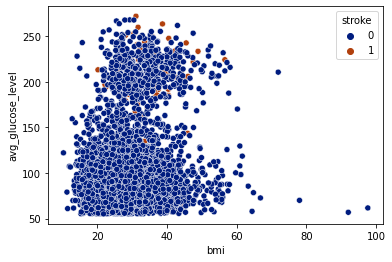

In [25]:
sns.scatterplot(x=df['bmi'], y=df['avg_glucose_level'], hue='stroke', data=df, palette='dark')
plt.savefig('../images/ana3.png')

Text(0.5, 1.0, 'BMI and avg_glucose_level')

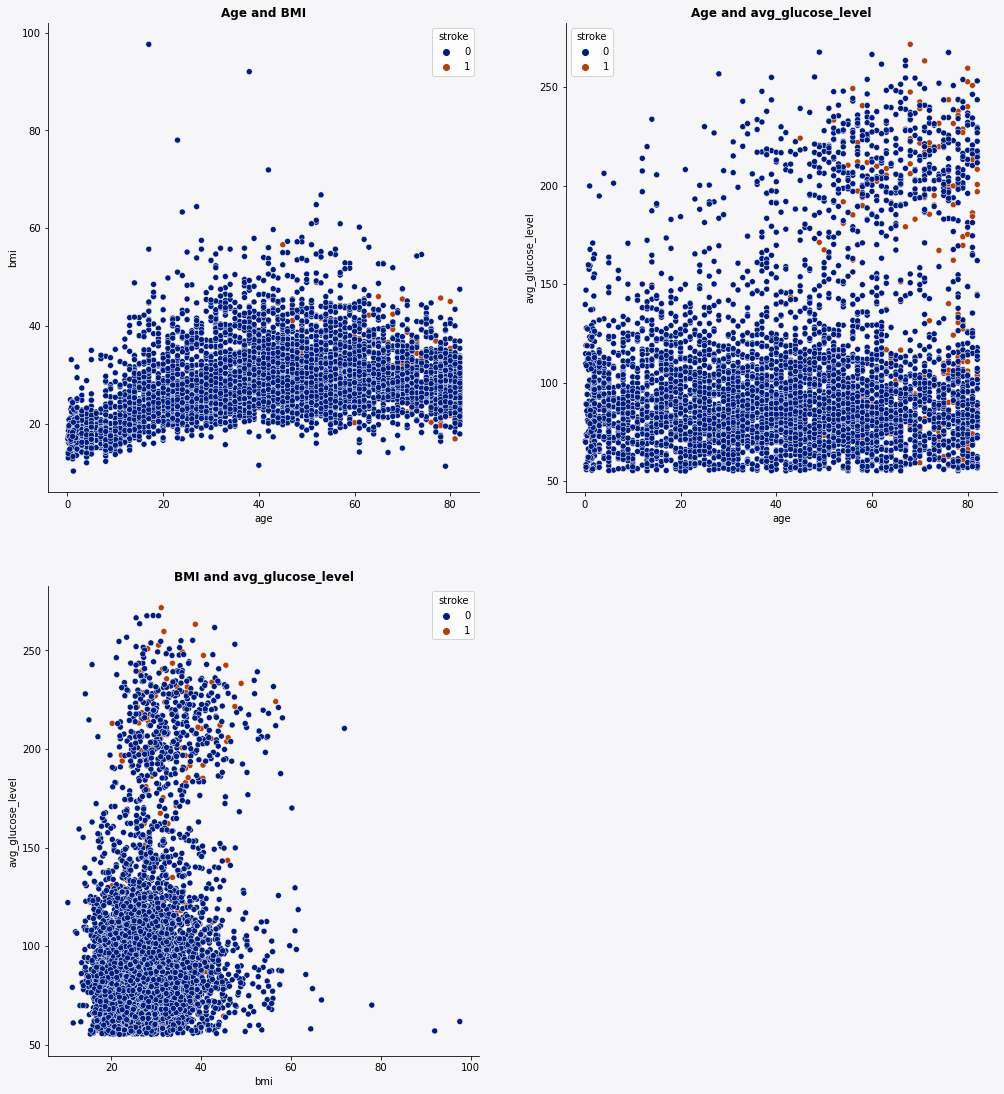

In [26]:
fig = plt.figure(figsize = (17,19), facecolor='#f6f5f7')
ax1 = plt.subplot(2,2,1,facecolor='#f6f5f7')
ax2 = plt.subplot(2,2,2,facecolor='#f6f5f7')
ax3 = plt.subplot(2,2,3,facecolor='#f6f5f7')
#removing spines
for t_r in ["top","right"]:
    ax1.spines[t_r].set_visible(False)
    ax2.spines[t_r].set_visible(False)
    ax3.spines[t_r].set_visible(False)


sns.scatterplot(ax=ax1, x=df['age'], y=df['bmi'], hue='stroke', data=df, palette='dark')
ax1.set_title('Age and BMI',fontweight='bold')
sns.scatterplot(ax=ax2, x=df['age'], y=df['avg_glucose_level'], hue='stroke', data=df, palette='dark')
ax2.set_title('Age and avg_glucose_level',fontweight='bold')
sns.scatterplot(ax=ax3, x=df['bmi'], y=df['avg_glucose_level'], hue='stroke', data=df, palette='dark')
ax3.set_title('BMI and avg_glucose_level',fontweight='bold')



### Observation
1) There are few outliers in Bmi & Age and BMI & Avg Glucose levels (keeping them as they are only few). 

2) The Age group is heavily distributed between 0 and 60

3) The Age and Avg_glucose_level has Only few cases of people with glucose levels less than 150 experienced stroke.

4) FROM THE ABOVE SCATTER PLOT IT IS QUITE VISIBLE THAT AS THE AGE INCREASE IT LEADS TO INCREASE IN GLUCOSE LEVEL

4) BMI and Glucose levels confirm that people with less than 150 glucose levels are less prone to strokes than people with glucose levels more than 150 level. BMI >40 have low avg glucose

### 1.2 Categorical Univariate Analysis 

In [ ]:
fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_categorical.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_categorical[val],palette='OrRd')

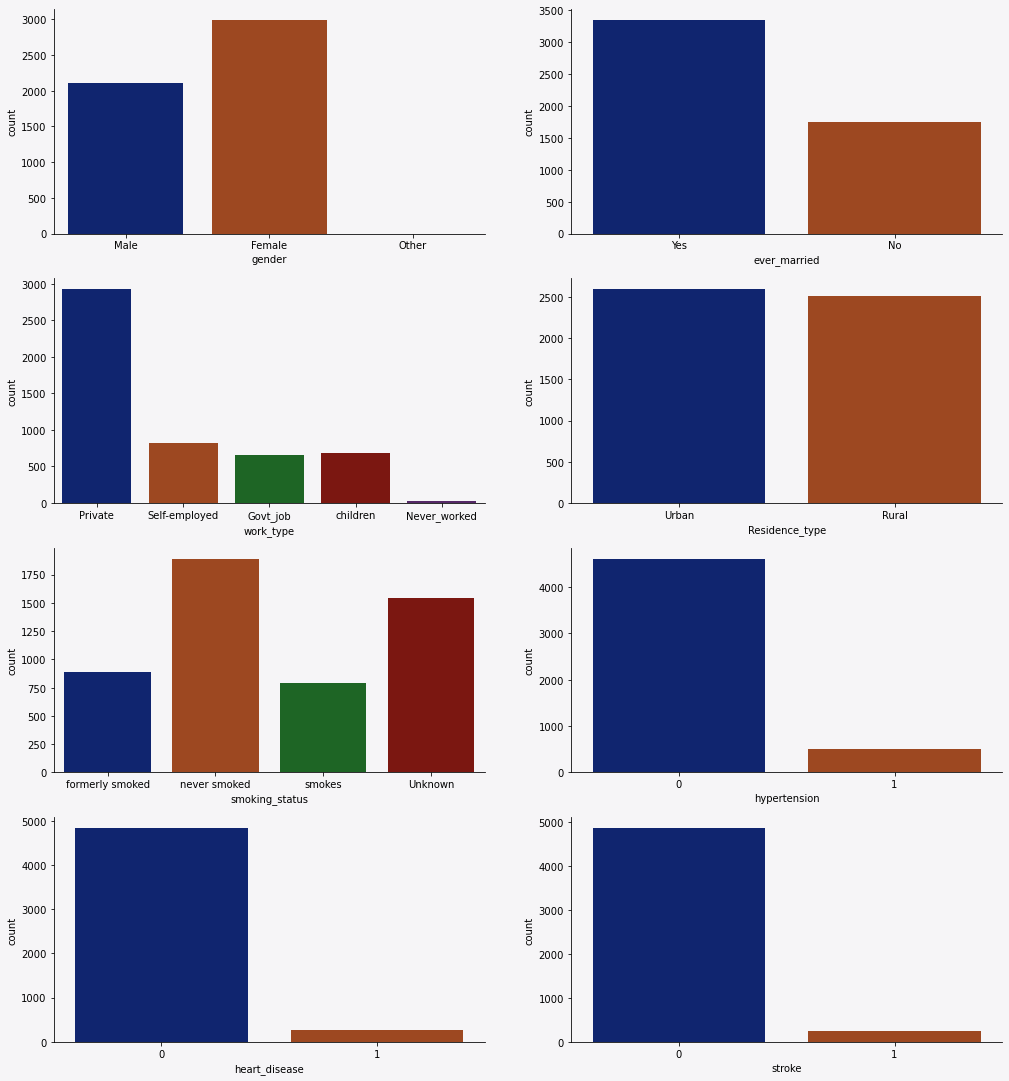

In [28]:
fig = plt.subplots(figsize = (17,19), facecolor='#f6f5f7')
#fig.set_facecolor('#f6f5f7')
#plt.title(f'Distribution of Categorical Risk Factors with respect to stroke')
i = 1
for cat_col_name in cat_col_names:
    axes = plt.subplot(4, 2, i, facecolor='#f6f5f7')
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    sns.countplot(x = df[cat_col_name], palette='dark')
    i+=1
#plt.title(f'Distribution of Categorical Risk Factors with respect to stroke')
plt.savefig('../images/cat_dist.png')
plt.show()

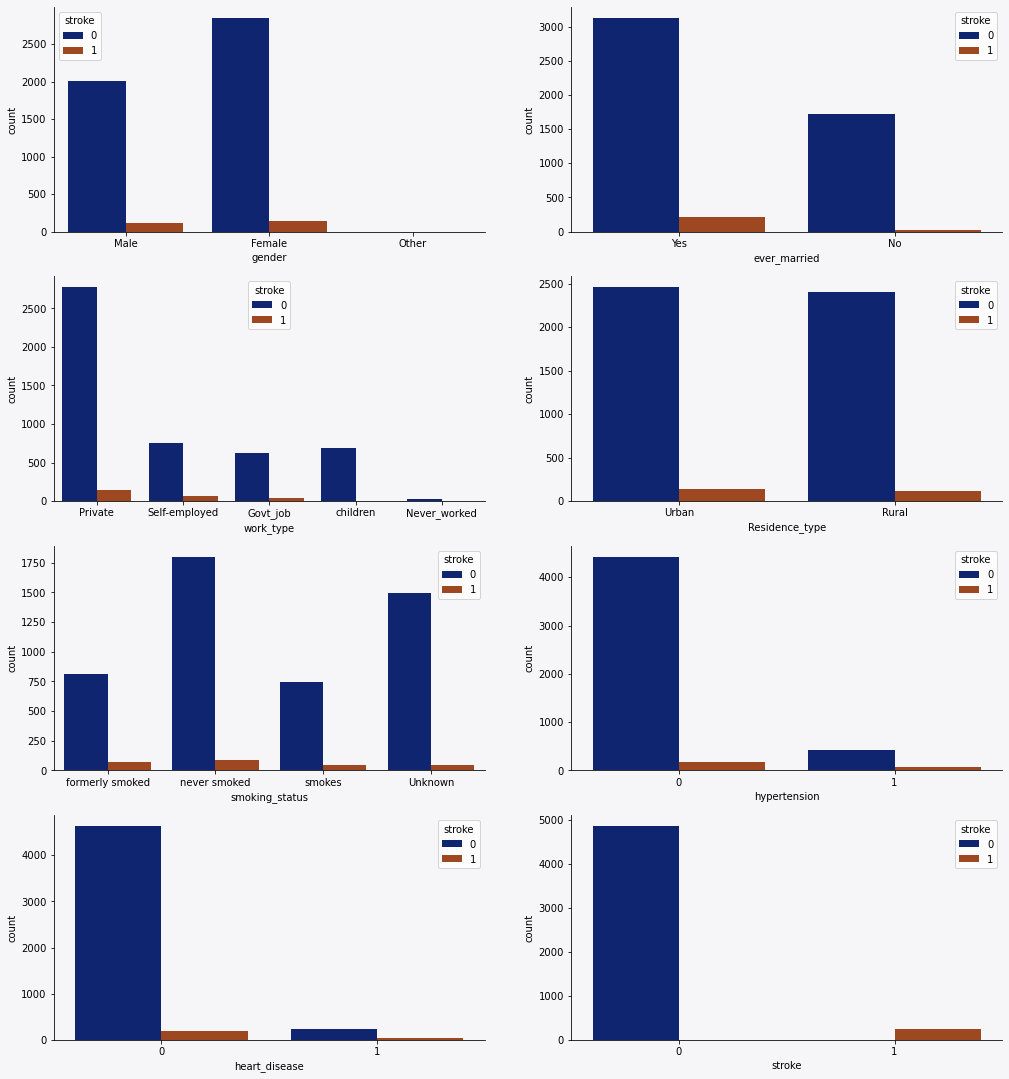

In [26]:
fig = plt.subplots(figsize = (17,19), facecolor='#f6f5f7')
#fig.set_facecolor('#f6f5f7')
#plt.title(f'Distribution of Categorical Risk Factors with respect to stroke')
i = 1
for cat_col_name in cat_col_names:
    axes = plt.subplot(4, 2, i, facecolor='#f6f5f7')
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    sns.countplot(x = df[cat_col_name], hue = df["stroke"], palette='dark')
    i+=1
#plt.title(f'Distribution of Categorical Risk Factors with respect to stroke')

plt.show()

### Observation
1. The number of male and female having stroke are almost equal in number.
2. The people suffering and not suffering with hypertension have almost same and no sign of heart stroke. This may be due to the fact that the number of records with stroke "1" is very less.
3. The married people are showing more signs for heart stroke
4. The people who are having private jobs are more prone to heart attack.
5) Seems that number of male and female who has stroke are equal in number.

6) The number of people who do not have hypertension also shows signs of no stroke. And people with hypertension also do not show signs of more people with stroke (may be due to the fact that our data has so many negative(0) variables).

7) The people with heart diesease show signs of stroke too(as expected).

8) The people who got married show signs of stroke way more than people who are unmarried ( expected i guess).

9) Private employees seems to experience stroke more than other work_types(may be due to work pressure). Self-employed people do show signs of stroke(may be due to reasons like heart disease,tension etc). Children can be ignored.

10) Almost no difference between people living in urban and rural areas in terms of stroke occurence.

11) People who formerly smoked and who smoke (combined) are showing signs of stroke way more than people who never smoked (considering the sample size of people who never smoked and people who used to smoke and smoke now).

## 1.3 Categorical Bavariate Analysis

<AxesSubplot:xlabel='stroke', ylabel='age'>

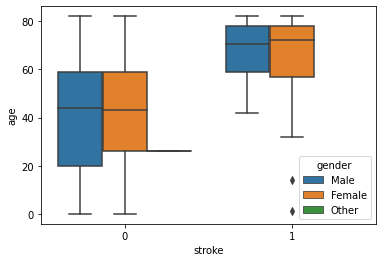

In [27]:
sns.boxplot(x=df['stroke'], y=df['age'], hue='gender',data=df)

In [28]:
def plot_cat_col(cat_col,df=df):
    s=sns.countplot(x=cat_col, data=df, hue='stroke', palette='deep')
    sizes = []
    for p in s.patches:
        height = p.get_height()
        sizes.append(height)
        s.text(p.get_x() + p.get_width()/2.,
               height+3,
               '{:1.2f}%'.format(height/len(df)*100),
               ha='center', fontsize=16)
    plt.show()

## Correlation

<AxesSubplot:>

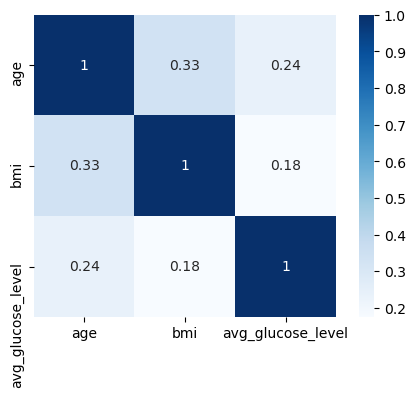

In [29]:
fig = plt.figure(figsize=(6,4), dpi=100)
sns.heatmap(data=df[num_col_names].corr(),cmap='Blues', annot=True, square=True)
plt.savefig('../images/corr1.png')

In [37]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<AxesSubplot:>

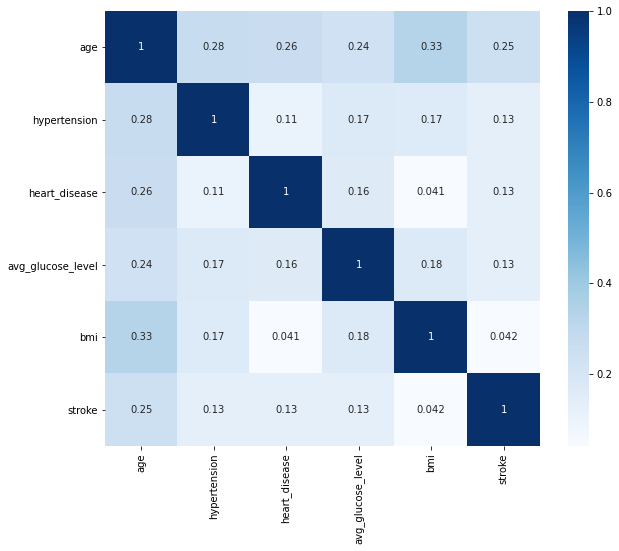

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(method='pearson'),cmap='Blues', annot=True, square=True)


### Observation
1) No strong correlation between our features.

2) The highest correlation can be observed between body mass index(bmi) and age.

3) The weakest correlation can be observed between heart_disease and hyper_tension (questionable).